Prueba de etiquetado de precios

In [155]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
data=pd.read_csv('DatosProcesados.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ancho            205 non-null    float64
 1   POM              205 non-null    int64  
 2   NúmeroCilindros  205 non-null    float64
 3   TamañoMotor      205 non-null    int64  
 4   HP               205 non-null    int64  
 5   Precio           205 non-null    float64
 6   Gama             205 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 11.3+ KB


<Axes: xlabel='Precio', ylabel='Count'>

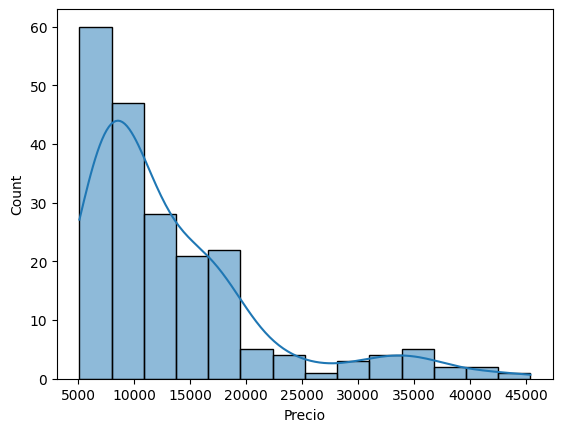

In [157]:
sns.histplot(data=data, x='Precio',kde=True,cbar=True)

# Modelo de regresión 

Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.

In [158]:
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

La siguiente celda se usa para evitar que salgan los warnings en el cálculo de los errores en sklearn.

In [159]:
import warnings
from warnings import simplefilter

# Ignorar los warnings de deprecación
simplefilter(action='ignore', category=FutureWarning)

Extraemos del dataframe **data** los datos que necesitamos para entrenar y testear el modelo, siendo **x_data** las variables e **y_data** en este caso sería la salida para el modelo de regresión. 

In [160]:
total=len(data.columns)
x_data=data.iloc[:,:total-2]
y_data=data.iloc[:,total-2:total-1]

Ahora pasamos a reescalar los datos debido a la diferencia entre los rangos de los valores de las columnas. Debido a la falta de valores atípicos se decide elegir el método de escalado **MinMax** para las variables

In [162]:
scaler=MinMaxScaler()
x_data=scaler.fit_transform(x_data)
y_data=scaler.fit_transform(y_data)

Se procede ahora a dividir el total de los datos en dos grupos **train** y **test** donde el primero es el que se usará para el entrenamiento de los modelos y el segundo se utilizará para validar el modelo y ver el error que se tiene

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)

Comenzaremos a probar con diferentes modelos para ver cual es el que mejor se adapta a este casoç

## Regresión lineal

In [125]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
y_predict=lin_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.009569701783690265
RMSE:  0.09782485258711236
R2 Score:  0.7758776702865369


In [126]:
y_entrenamiento=lin_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  

R2 Score Entrenamiento:  0.8400296526638429


## Regresión Ridge

In [164]:
ridge_reg=Ridge(alpha=1.30)
ridge_reg.fit(x_train,y_train)
y_predict=ridge_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.010152927264694632
RMSE:  0.10076173512149655
R2 Score:  0.7622185347663757


In [165]:
y_entrenamiento=ridge_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  

R2 Score Entrenamiento:  0.8305155293680593


## Regresión Lasso

In [129]:
lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(x_train,y_train)
y_predict=lasso_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.042815591758192044
RMSE:  0.2069192880284292
R2 Score:  -0.002740773935190788


In [130]:
y_entrenamiento=lasso_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  

R2 Score Entrenamiento:  0.0


## Regresión polinómica

In [131]:
#grado del polinomio
degree=2
poly_reg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
poly_reg.fit(x_train,y_train)
y_predict=poly_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.006740261557860152
RMSE:  0.08209909596250224
R2 Score:  0.8421431349302527


In [132]:
y_entrenamiento=poly_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  

R2 Score Entrenamiento:  0.9135934349944753


## Regresión de Árbol de desición

In [133]:
trre_reg=DecisionTreeRegressor(max_depth=6, criterion='squared_error')
trre_reg.fit(x_train,y_train)
y_predict=trre_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.004100980426861302
RMSE:  0.06403889776425967
R2 Score:  0.9039550752831259


In [134]:
y_entrenamiento=trre_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  

R2 Score Entrenamiento:  0.986028924723832


## Vectores de soporte

In [135]:
svm_reg=SVR(kernel='rbf',C=1.0, epsilon=0.01)
svm_reg.fit(x_train,y_train)
y_predict=svm_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

MSE:  0.007570631017022112
RMSE:  0.08700937315612677
R2 Score:  0.8226958896642126


c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [136]:
y_entrenamiento=svm_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  

R2 Score Entrenamiento:  0.9501595831100376


Se puede ver en la siguiente tabla de errores que el modelo con el menor R2 score es de *Regresión del Árbol de Decisión*, a primera vista parecería ser el mejor modelo pero ahora debemos comparar el comportamiento con los datos que estaban fuera del entrenamiento con los que estaban dentro.

|Error|Lineal|Ridge|Lasso|Polinómica|Árbol|SVR|
|-----|------|-----|-----|----------|-----|---|
|MSE|  0.00957|0.01015|0.04282|0.00674|0.00345|0.00757|
|RMSE|  0.09782|0.10076|0.20692|0.08210|0.05877| 0.08701|
|R2 Score| 0.77588|0.76222|-0.00274|0.84214|0.91911|0.82270|

En la siguiente tabla vemos el error con los datos de prueba y con los datos de entrenamiento para ver la diferencia.

|Error|Lineal|Ridge|Lasso|Polinómica|Árbol|SVR|
|-----|------|-----|-----|----------|-----|---|
|R2 Score| 0.77588|0.76222|-0.00274|0.84214|0.91911|0.82270|
|R2 Score Ent.|0.84003|0.83052|0.0|0.91359|0.98602|0.95016|

Si bien los modelos de los últmios 3 columnas tiene un R2 Score alto el modelo que tiene menor diferencia entre el error en fase de entrenamiento y en fase de prueba es el modelo de regresión *Ridge*  con 0.0683. Por lo que es el que mejor se comporto, si bien es de destacar que ninguno se comporto de una manera sobresaliente en lo que se referiere a la diferencia de comportamiento entre la fase de entrenamiento y la de prueba.

Ahora se procede a optimizar el hiperparametro del modelo en cuestión para no hacer una busqueda a mano por todos los posibles valores del mismo se realiza un busqueda en grilla como sigue a continuación.

In [172]:
min=0.1
max=2.0
par_alpha=np.linspace(0.1,2.0,20)
param_grid={'alpha':par_alpha}
grid_search=GridSearchCV(ridge_reg,param_grid,cv=5,scoring='r2')
grid_search.fit(x_train,y_train)
print(f'El mejor parámetro es: ',grid_search.best_params_)

El mejor parámetro es:  {'alpha': 0.7}


A continuación se vuelve a repetir el proceso para el modelo *Ridge* y se puede ver como la diferencia del *R2* disminuye muy poco pero ya tenemos el mejor parámetro para nuestro modelo.

In [176]:
best_param=grid_search.best_params_['alpha']

In [178]:
ridge_reg=Ridge(alpha=best_param)
ridge_reg.fit(x_train,y_train)
y_predict=ridge_reg.predict(x_test)
#Errores
mse_error=mean_squared_error(y_test,y_predict,squared=True)
rmse_error=mean_squared_error(y_test,y_predict,squared=False)
score=r2_score(y_test,y_predict)
print(f'MSE: ',mse_error)
print(f'RMSE: ',rmse_error)
print(f'R2 Score: ',score)

y_entrenamiento=ridge_reg.predict(x_train)
r2_score(y_train,y_entrenamiento)     
print(f'R2 Score Entrenamiento: ',r2_score(y_train,y_entrenamiento))  
print(f'Diferencia de R2: ',r2_score(y_train,y_entrenamiento)-r2_score(y_test,y_predict))

MSE:  0.009867924636590098
RMSE:  0.09933742817583964
R2 Score:  0.7688932937535482
R2 Score Entrenamiento:  0.8351646387166201
Diferencia de R2:  0.06627134496307185


# Modelos de clasificación

Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición.

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [138]:
total=len(data.columns)
x=data.iloc[:,:total-2]
y=data.iloc[:,total-1:]

In [139]:
x

,Ancho,POM,NúmeroCilindros,TamañoMotor,HP
0,64.1,2548,4.0,130,111
1,64.1,2548,4.0,130,111
2,65.5,2823,6.0,152,154
3,66.2,2337,4.0,109,102
4,66.4,2824,5.0,136,115
...,...,...,...,...,...
200,68.9,2952,4.0,141,114
201,68.8,3049,4.0,141,160
202,68.9,3012,6.0,173,134
203,68.9,3217,6.0,145,106


Debido a que los datos fueron dividos en gama *Alta* y *Baja* en base a la mediana tenemos practicamente la misma cantidad de datos en ambos grupos, solo tenemos unos mas en el de los vehículos de gama alta.

<Axes: xlabel='Gama', ylabel='count'>

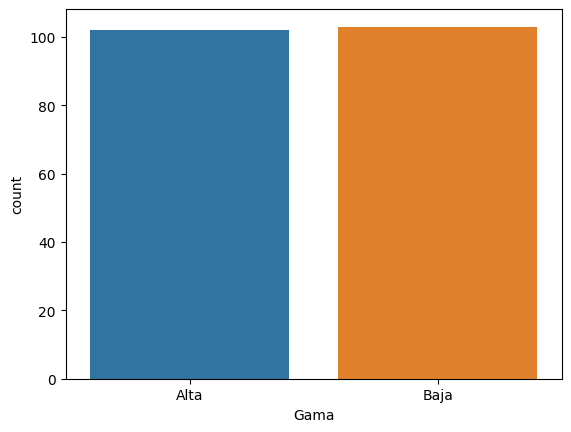

In [140]:
sns.countplot(data=y, x='Gama', hue='Gama')

Realizamos el mismo procedimiento con los datos para tener un subset de datos para entrenar y otro para validarlo.

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=40)

## Regresion Logística

In [142]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
y_predict=log_reg.predict(x_test)

c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


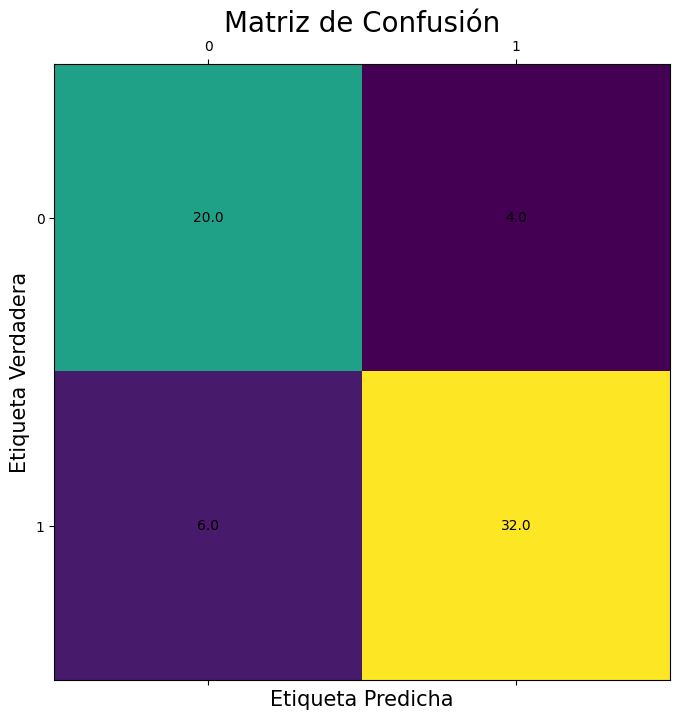

In [143]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [144]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Alta       0.77      0.83      0.80        24
        Baja       0.89      0.84      0.86        38

    accuracy                           0.84        62
   macro avg       0.83      0.84      0.83        62
weighted avg       0.84      0.84      0.84        62



## Árbol de Decisiones

In [145]:
tree_clf=DecisionTreeClassifier()
tree_clf.fit(x_train,y_train)
y_predict=tree_clf.predict(x_test)

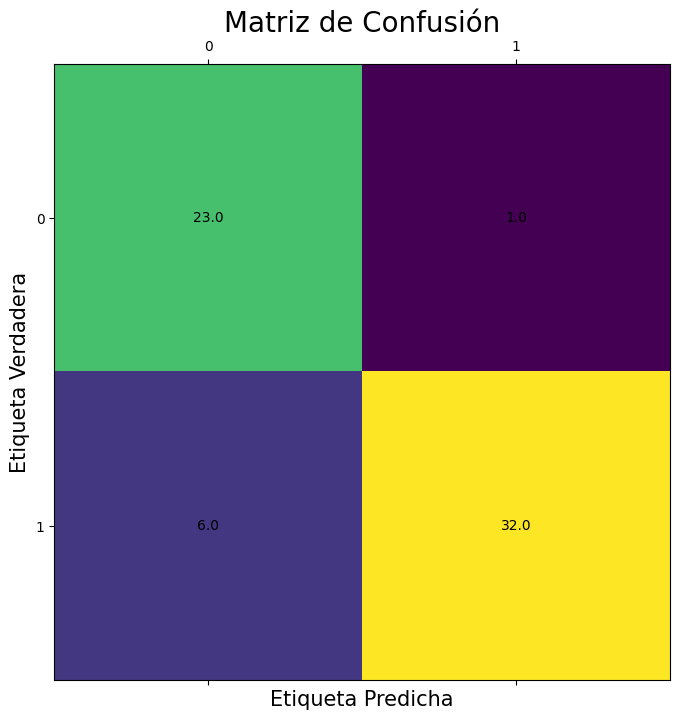

In [146]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [147]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Alta       0.79      0.96      0.87        24
        Baja       0.97      0.84      0.90        38

    accuracy                           0.89        62
   macro avg       0.88      0.90      0.88        62
weighted avg       0.90      0.89      0.89        62



## K Vecinos

In [148]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)

c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


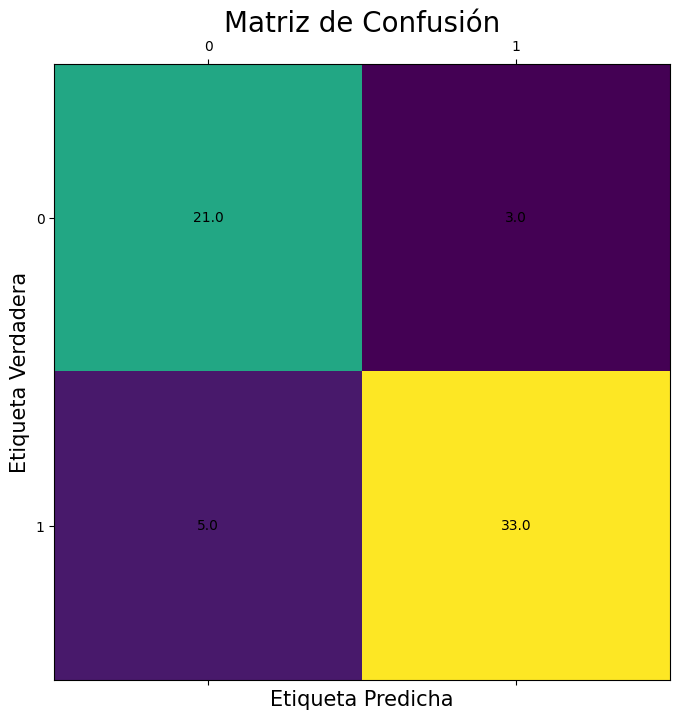

In [149]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [150]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Alta       0.81      0.88      0.84        24
        Baja       0.92      0.87      0.89        38

    accuracy                           0.87        62
   macro avg       0.86      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



## SVM

In [151]:
svm=SVC()
svm.fit(x_train,y_train)
y_predict=svm.predict(x_test)

c:\Users\juan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


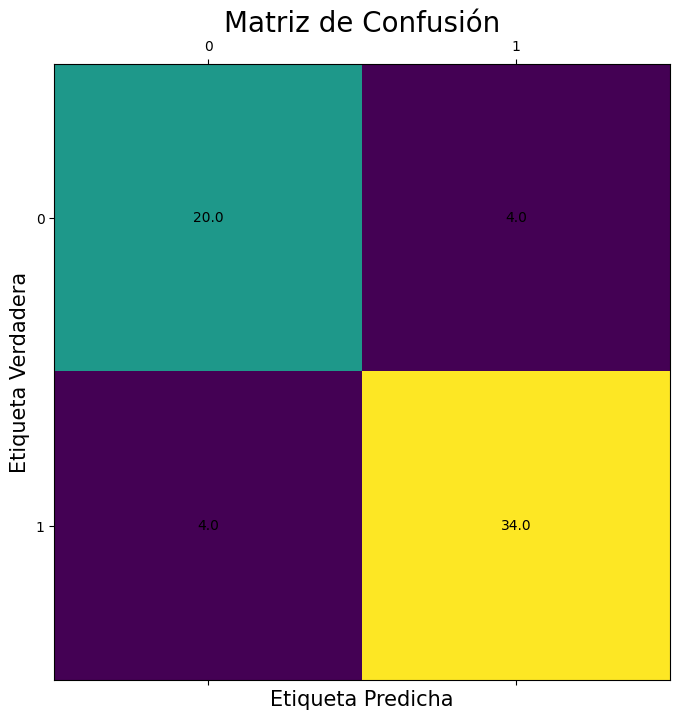

In [152]:
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [153]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        Alta       0.83      0.83      0.83        24
        Baja       0.89      0.89      0.89        38

    accuracy                           0.87        62
   macro avg       0.86      0.86      0.86        62
weighted avg       0.87      0.87      0.87        62

